In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv("tanzania_water_pump_org.csv")
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


1. Mostrar algún diagrama para mostrar casos de nulos.


In [14]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/1860983835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(-1, np.nan, inplace=True)
/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/1860983835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

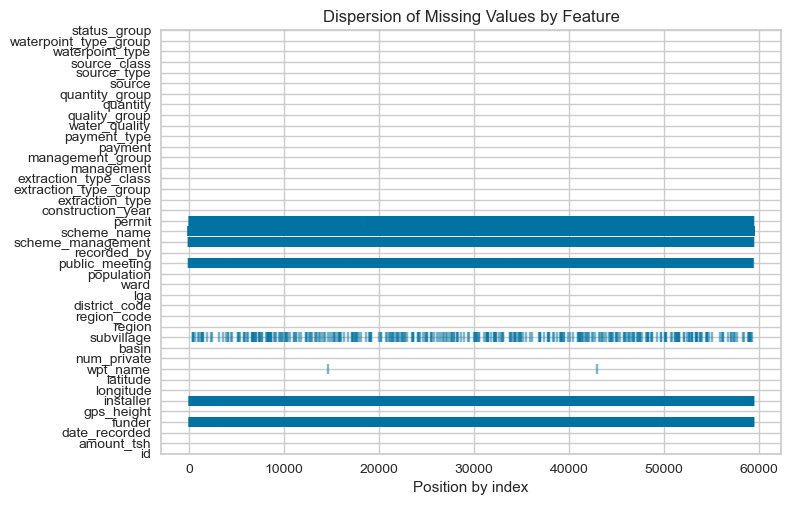

<Axes: title={'center': 'Dispersion of Missing Values by Feature'}, xlabel='Position by index'>

In [15]:
# aplicar esta factorización a la lista de categorical_columns
for column in categorical_columns:
    df[[column]] = df[[column]].apply(lambda x: pd.factorize(x)[0])
    df[column].replace(-1, np.nan, inplace=True)

from yellowbrick.contrib.missing import MissingValuesDispersion

# visualizador de la columna installer
visualizer = MissingValuesDispersion(features=df.columns)
visualizer.fit(df)
visualizer.show()

2. Eliminar atributos con un número de nulos mayor que el 30%.


In [16]:
threshold = len(df) * 0.3

df = df.dropna(thresh=threshold, axis=1)

print(df.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


3. Mostrar distribución de nulos.


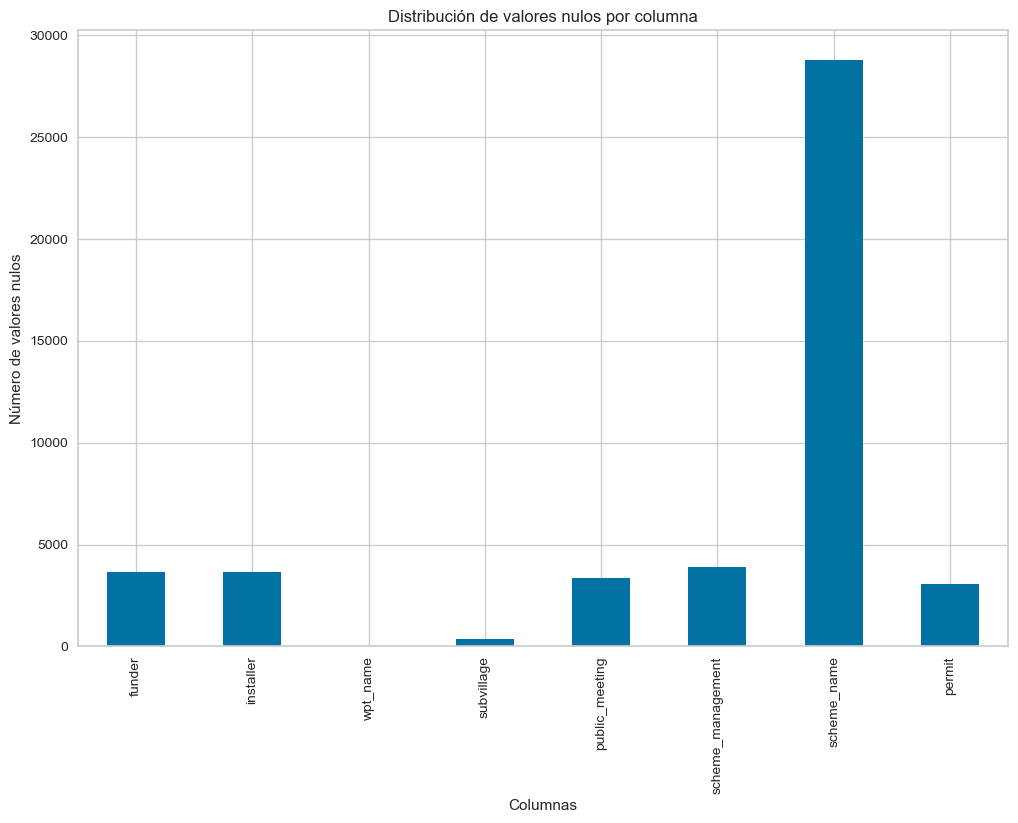

In [17]:
import matplotlib.pyplot as plt

# Contar los valores nulos en cada columna
missing_values = df.isnull().sum()

# Filtrar las columnas que tienen valores nulos
missing_values = missing_values[missing_values > 0]

# Crear un gráfico de barras para mostrar la distribución de valores nulos
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar')
plt.title('Distribución de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.show()

4. Comparar el número de filas eliminando y no eliminando nulos.


In [18]:
# Número de filas antes de eliminar nulos
rows_before = df.shape[0]

# Eliminar filas con valores nulos
df_cleaned = df.dropna()

# Número de filas después de eliminar nulos
rows_after = df_cleaned.shape[0]

print(f"Número de filas antes de eliminar nulos: {rows_before}")
print(f"Número de filas después de eliminar nulos: {rows_after}")

Número de filas antes de eliminar nulos: 59400
Número de filas después de eliminar nulos: 27171


5. Eliminar nulos sobre el original aplicando una imputación sencilla (media, moda, etc.).


In [19]:
# Imputar valores nulos con la media de cada columna usando el conjunto transformado (sin categóricos)
df_imputed = df.fillna(df.mean())

# Verificar si hay valores nulos restantes
print(df_imputed.isnull().sum())

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [24]:
from sklearn.impute import SimpleImputer
df = pd.read_csv("tanzania_water_pump_org.csv")

#imputar valores nulos con la media de cada columna y la moda

# Identificar columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=['number']).columns
columnas_categoricas = df.select_dtypes(exclude=['number']).columns

# Imputar columnas numéricas con la media
imputador_numerico = SimpleImputer(strategy='mean')
df_numerico = pd.DataFrame(imputador_numerico.fit_transform(df[columnas_numericas]), columns=columnas_numericas)

# Imputar columnas categóricas con la moda
imputador_categorico = SimpleImputer(strategy='most_frequent')
df_categorico = pd.DataFrame(imputador_categorico.fit_transform(df[columnas_categoricas]), columns=columnas_categoricas)

# Combinar los datos imputados
df_imputado = pd.concat([df_numerico, df_categorico], axis=1)

# Asegurar que las columnas estén en el orden original
df_imputado = df_imputado[df.columns]

# Opcional: Verificar que no queden valores faltantes
print(df_imputado.isnull().sum())

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

6. Imputar los nulos sobre el original aplicando el KNN.


In [26]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5) # probar con otro valor de vecinos
df = pd.read_csv("tanzania_water_pump_org.csv")


# convertimos atributos nominales a numéricos como hicimos antes
for column in categorical_columns:
    df[[column]] = df[[column]].apply(lambda x: pd.factorize(x)[0])
    df[column].replace(-1, np.nan, inplace=True)

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

print(df_knn_imputed.isnull().sum())

/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/3407384431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(-1, np.nan, inplace=True)
/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/3407384431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

7. Realizar un IterativeImputer usando un SVR como imputador base. Comparar con el resultado de IterativeImputer con LR y RF.


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Cargar el dataset original
df = pd.read_csv("tanzania_water_pump_org.csv")

# Convertir atributos nominales a numéricos como hicimos antes
for column in categorical_columns:
    df[[column]] = df[[column]].apply(lambda x: pd.factorize(x)[0])
    df[column].replace(-1, np.nan, inplace=True)

# Definir los imputadores base
imputadores_base = {
    'SVR': SVR(),
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=10, random_state=0)
}

# Imputar los valores nulos usando IterativeImputer con diferentes imputadores base
resultados_imputacion = {}

for nombre, imputador_base in imputadores_base.items():
    iterative_imputer = IterativeImputer(estimator=imputador_base, max_iter=10, random_state=0)
    df_imputed = pd.DataFrame(iterative_imputer.fit_transform(df), columns=df.columns)
    resultados_imputacion[nombre] = df_imputed

# Verificamos si hay valores nulos restantes en cada imputación
for nombre, df_imputed in resultados_imputacion.items():
    print(f"Valores nulos restantes con {nombre}:")
    print(df_imputed.isnull().sum())
    print()

/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/2069555210.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(-1, np.nan, inplace=True)
/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_94724/2069555210.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

8. Cambia la fórmula en la imputación múltiple para imputar otros atributos y pensar qué atributos intervienen (¿la longitu del sépalo influye en la anchura del pétalo por ejemplo?)


In [5]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.imputation.bayes_mi import BayesGaussMI, MI
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn import datasets
iris_dataset = datasets.load_iris(as_frame=True)
X_iris = iris_dataset.data.copy()

#Prepare the dataset to test sk-learn imputation values tools
np.random.seed(42)
rows = np.random.randint(0, np.shape(X_iris)[0], 50)
# No modifico la última característica
cols = np.random.randint(0, np.shape(X_iris)[1]-1, 50)
X_iris_missing = X_iris.to_numpy()
#Add missing values in random entries from the iris dataset
X_iris_missing[rows, cols] = np.NaN
X_iris_missing = pd.DataFrame(X_iris_missing, columns=X_iris.columns)

# Supongamos que ya tienes X_iris_missing (datos con valores faltantes) y y_true (etiquetas reales)
# Asegúrate de que X_iris_missing sea un DataFrame y tenga una columna 'target' para las etiquetas
# Si no tienes la columna 'target', agrega y_true a tus datos
y_true = iris_dataset.target.copy()
X_iris_missing['target'] = y_true

# Estandarización de datos (excepto la columna 'target')
features = X_iris_missing.drop(columns='target')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_iris_missing_scaled = pd.DataFrame(features_scaled, columns=features.columns)
X_iris_missing_scaled['target'] = y_true  # Agregar la columna 'target' nuevamente



# **Renombrar columnas para eliminar espacios y caracteres especiales**
X_iris_missing_scaled.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)

# mostrar los datos perdidos de la columna 'sepal_length'
print(X_iris_missing_scaled['sepal_length'].isnull().sum())

# Crear instancia de BayesGaussMI
bayes_imputer = BayesGaussMI(X_iris_missing_scaled)

# Definir funciones para pasar los argumentos y palabras clave al modelo
def model_args_fn(data):
    return ()

def model_kwds_fn(data):
    return {'data': data}

# Crear una lista para almacenar los conjuntos de datos imputados
imputed_datasets = []

# Definir una función de callback para capturar las imputaciones
def save_imputed_data(result):
    # Acceder al conjunto de datos imputado desde result.model.data.frame
    imputed_data = result.model.data.frame.copy()
    imputed_datasets.append(imputed_data)
    return None  # No es necesario devolver nada

mi = MI(
    imp=bayes_imputer,
    model=sm.OLS,
    formula="petal_length ~ petal_width", #Imputamos aquí la longitud del pétalo a partir del ancho del pétalo que deben estar relacionados
    model_args_fn=model_args_fn,
    model_kwds_fn=model_kwds_fn,
    nrep=20
)

# Ejecutar el método fit para realizar las imputaciones y ajustar el modelo
mi_results = mi.fit(results_cb=save_imputed_data)

# Ahora, aplicar SVM a cada uno de los conjuntos de datos imputados
predictions = []
for imputed_df in imputed_datasets:
    X = imputed_df.drop(columns='target')
    y = imputed_df['target'].astype(int)
    svm_model = SVC()
    svm_model.fit(X, y)
    preds = svm_model.predict(X)
    predictions.append(preds)

# Convertir las predicciones en un array numpy
predictions = np.array(predictions)  # Dimensiones: (n_imputaciones, n_muestras)

# Verificar el contenido y la forma de 'predictions'
print('Shape of predictions:', predictions.shape)
print('Predictions array:')
print(predictions)

# Votación por mayoría simple utilizando 'keepdims=True' en 'mode'
final_predictions = mode(predictions, axis=0, keepdims=True).mode[0]

# Alternativamente, utilizar 'numpy.bincount'
# final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Evaluar las predicciones finales
accuracy = accuracy_score(y_true, final_predictions)
print(f"Exactitud del modelo SVM con votación: {accuracy}")

16
Shape of predictions: (20, 150)
Predictions array:
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]
Exactitud del modelo SVM con votación: 0.98


9. Comparar los resultados de diferentes imputaciones usando una métrica (MSE, RMSE) con los valores originales del dataset.


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Cargar el conjunto de datos Iris
iris_dataset = datasets.load_iris(as_frame=True)
X_iris = iris_dataset.data.copy()

# Escalar los datos originales
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
X_iris_scaled = pd.DataFrame(X_iris_scaled, columns=X_iris.columns)

# Introducir valores faltantes aleatoriamente
np.random.seed(42)
num_missing = 50  # Número de valores faltantes a introducir
rows = np.random.randint(0, X_iris_scaled.shape[0], num_missing)
cols = np.random.randint(0, X_iris_scaled.shape[1]-1, num_missing)  # No modificamos la última característica

# Crear una copia de los datos escalados para introducir los valores faltantes
X_iris_missing_scaled = X_iris_scaled.copy()
X_iris_missing_scaled.values[rows, cols] = np.nan

# Crear una máscara de los valores faltantes
missing_mask = X_iris_missing_scaled.isnull()

# Obtener las posiciones de los valores faltantes
missing_positions = np.where(missing_mask)
original_missing_values = X_iris_scaled.values[missing_positions]
# Crear los imputadores
imputer_mean = SimpleImputer(strategy='mean')
imputer_knn = KNNImputer(n_neighbors=5)
imputer_iterative = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),random_state=42)

# Ajustar e imputar los datos
X_imputed_mean = imputer_mean.fit_transform(X_iris_missing_scaled)
X_imputed_knn = imputer_knn.fit_transform(X_iris_missing_scaled)
X_imputed_iterative = imputer_iterative.fit_transform(X_iris_missing_scaled)


# Obtener los valores imputados en las posiciones de los valores faltantes
imputed_mean_values = X_imputed_mean[missing_positions]
imputed_knn_values = X_imputed_knn[missing_positions]
imputed_iterative_values = X_imputed_iterative[missing_positions]

# Obtener los valores originales en las posiciones de los valores faltantes
imputed_mean_values = X_imputed_mean[missing_positions]
imputed_knn_values = X_imputed_knn[missing_positions]
imputed_iterative_values = X_imputed_iterative[missing_positions]

# Calcular el MSE
mse_mean = mean_squared_error(original_missing_values, imputed_mean_values)
mse_knn = mean_squared_error(original_missing_values, imputed_knn_values)
mse_iterative = mean_squared_error(original_missing_values, imputed_iterative_values)

#print de todos los MSE
print(f"MSE con imputación por media: {mse_mean}")
print(f"MSE con imputación por KNN: {mse_knn}")
print(f"MSE con imputación iterativa: {mse_iterative}")


MSE con imputación por media: 0.8675987328765983
MSE con imputación por KNN: 0.17573758215815774
MSE con imputación iterativa: 0.25728262874640234


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


10. ¿Qué ocurre si hay variables categóricas? Considerar el dataset "tanzania_water_pump" y utilizar transformación de datos para procesar los datos nominales. ¿Qué transformación funciona mejor para las diferentes imputaciones? ¿Se podría aplicar un clasificador para estimar los valores categóricos/nominales en lugar de hacer la transformación?


In [22]:
# imputación simple con media y moda
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


# Cargar el dataset
df = pd.read_csv("tanzania_water_pump_org.csv")

# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


# Crear el imputador con estrategia 'most_frequent'
imputer_mode = SimpleImputer(strategy='most_frequent')

# Aplicar el imputador a las variables categóricas
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Imputar variables numéricas con la media
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

print(df.isnull().sum())

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [25]:
# Cargar el dataset
df = pd.read_csv("tanzania_water_pump_org.csv")

# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

#transformamos los datos
for column in categorical_cols:
    df[[column]] = df[[column]].apply(lambda x: pd.factorize(x)[0])
    df[column].replace(-1, np.nan, inplace=True)
    
# Imputar variables numéricas con la media
imputer_mean = SimpleImputer(strategy='mean')
df_media = imputer_mean.fit_transform(df)

/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_95413/1658596935.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(-1, np.nan, inplace=True)
/var/folders/9v/xkgrjrbs4bb451f2mdx7b17w0000gp/T/ipykernel_95413/1658596935.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Cargar el dataset
df = pd.read_csv("tanzania_water_pump_org.csv")

# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

#usamos un random forest para imputar los datos faltantes de los atributos categóricos
for column in categorical_cols:
    #imputamos los valores faltantes con un RandomForest Classifier de cada atributo categorico
    if df[column].isnull().any():
        
        
        # Separar las filas con y sin valores faltantes en la columna objetivo
        df_notnull = df[df[column].notnull()].copy()
        df_null = df[df[column].isnull()].copy()
        
        # Identificar columnas categóricas con valores faltantes, excluyendo la columna objetivo
        cat_cols_with_missing = df_notnull[categorical_cols].columns[df_notnull[categorical_cols].isnull().any()]
        cat_cols_with_missing = cat_cols_with_missing.drop(column) if column in cat_cols_with_missing else cat_cols_with_missing
        
        # Columnas a excluir: columnas con valores faltantes y la columna objetivo
        columns_to_exclude = cat_cols_with_missing.tolist() + [column]
        
        # Variables predictoras (excluyendo la columna objetivo y las que tienen valores perdidos)
        features = df.columns.drop(columns_to_exclude)
        print(f"Imputando valores faltantes en '{column}' con los atributos: {features.tolist()}")
        
        # Preparar los datos de entrenamiento y prueba
        X_train = df_notnull[features]
        y_train = df_notnull[column]
        X_test = df_null[features]
        
        # Combinar los datos de entrenamiento y prueba para el preprocesamiento
        X_combined = pd.concat([X_train, X_test], axis=0)
        
        # Identificar todas las columnas categóricas excepto la columna objetivo
        all_categorical_cols = X_combined.select_dtypes(include=['object', 'category']).columns.tolist()
        
        # Preprocesamiento: Codificación One-Hot de las variables categóricas
        preprocessor = ColumnTransformer(
            transformers=[
                #('cat', OneHotEncoder(handle_unknown='ignore'), all_categorical_cols) #muy lento, genera muchos atributos derivados
                ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), all_categorical_cols) #más rápido, pero no es tan preciso      
            ],
            remainder='passthrough'  # Mantener las columnas numéricas sin cambios
        )
        
        # Aplicar el preprocesamiento
        X_combined_encoded = preprocessor.fit_transform(X_combined)
        
        # Dividir nuevamente los datos en entrenamiento y prueba
        X_train_encoded = X_combined_encoded[:X_train.shape[0], :]
        X_test_encoded = X_combined_encoded[X_train.shape[0]:, :]
        
        # Codificar la variable objetivo
        y_train_encoded = y_train.astype('category').cat.codes
        class_mapping = dict(enumerate(y_train.astype('category').cat.categories))
        
        # Entrenar el clasificador
        #clf = RandomForestClassifier(n_estimators=10, random_state=42) # tarda muchisimo
        #clf = DecisionTreeClassifier() # aun lento
        clf = LogisticRegression() #aun lento
        clf.fit(X_train_encoded, y_train_encoded)
        
        # Predecir los valores faltantes
        y_pred_encoded = clf.predict(X_test_encoded)
        y_pred = pd.Series(y_pred_encoded).map(class_mapping)
        
        # Imputar los valores faltantes en el DataFrame original
        df.loc[df[column].isnull(), column] = y_pred.values
    

Imputando valores faltantes en 'funder' con los atributos: ['id', 'amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'recorded_by', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Imputando valores faltantes en 'installer' con los atributos: ['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'longitude', 'latitude', 'num_private', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'recorded_by', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Imputando valores faltantes en 'wpt_name' con los atributos: ['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'recorded_by', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


KeyboardInterrupt: 